# Sentiment Analysis and Topic Modeling of Meta Quest 2 Product Reviews

<h3 align="center">
  Abstract
</h3>
<p>This study aims to analyze the sentiment and identify the main topics discussed in Meta Quest 2 product reviews scraped from the Argos website using Selenium. To achieve this goal, we first preprocessed the reviews by removing unwanted characters and applying text normalization techniques. Then, we applied sentiment analysis using a machine learning classifier to classify the reviews into positive, negative, and neutral categories. Finally, we used topic modeling to identify the main themes discussed in the reviews. The results of the sentiment analysis showed that a majority of the reviews were positive, while the topic modeling revealed that the main topics discussed included battery life, fun and overall satisfaction. the results are visualized using word clouds and line charts. The insights gained from this analysis can potentially be useful for understanding customer opinions and preferences, as well as identifying potential issues or areas for improvement in the product.
</p>



## 1.Introduction
<p> Virtual reality (VR) headsets have become increasingly popular in recent years, offering a new level of immersion and interactivity for gaming, entertainment, education and even socializing. As the VR industry continues to grow, it is important for companies to understand the sentiment and concerns of their customers in order to improve the user experience and stay competitive in the market [1]. With the emergence of the metaverse, a virtual world that is accessed through the internet and where people can interact with each other and virtual objects, it is even more crucial for businesses to understand the sentiment and topics being discussed by VR headset users. </p>
<p>
the Meta Quest 2 offers a good value for its price and has a large selection of available content. By analyzing the sentiment and identifying the main topics discussed in reviews of the Meta Quest 2, businesses and developers can gain insights into customer opinions and preferences, as well as identify potential areas for improvement in the product. The Meta Quest 2's wide selection of content and versatility in terms of use make it an ideal subject for such analysis.
</p>



### 1.2.Aims and objectives
<p> The main aim of this notebook, is to analyze the sentiment of the reviews and identify the main topics discussed in Meta Quest 2 product reviews scraped from the Argos website using Selenium.visualize the results in order to communicate the findings effectively.
<ul>
  <li>Scrape product reviews from the Argos website using Selenium.</li>
  <li>Preprocess the data by cleaning and standardizing it for further analysis.</li>
  <li>Use NLTK to perform sentiment analysis on the reviews.</li>
  <li>Use BERTopic to identify the main topics discussed in the reviews.</li>
  <li>Visualize the results using wordclouds and bar plots.</li>
  <li>Communicate the findings effectively through the use of visualization.</li>
</ul>
</p>



### 1.3.Dataset
<p> For the purpose of this project, I chose to utilize the Selenium web scraping library to obtain a dataset of reviews for the Meta Quest 2 virtual reality headset from the Argos website, a leading retailer in the United Kingdom. I chose to use Selenium library due to its ability to handle dynamic websites which will be needed for scraping the reviews 
</p>



### 1.4.Ethical considerations 
<ul>
<li>According to the website terms and conditions of Argos, scraping data for non-commercial purposes is permitted. This means that individuals or organizations may use web scraping techniques to extract data from the Argos website for research or personal use, as long as the data is not being used for commercial gain. </li>
<li>
According to the website terms and condition of Argos, it is legal to use data that is publicly available, provided that it is used ethically and in accordance with the terms and conditions of the website.   
</li>
<li>
According to the information contained in the robots.txt file of the Argos website, it does not appear that scraping reviews is explicitly disallowed.
</li>
</ul>





### 1.5.Dependencies

The following code will create a text file called requirements.txt that lists all the dependencies needed for this notebook

In [ ]:
!pip freeze > requirements.txt

use ` pip install -r requirements.txt ` to install all the packages and versions listed in the requirements.txt

In [ ]:
# pip install -r requirements

## 2.Extracting Product Reviews from the Web with Selenium
<p>
 Web scraping is the process of extracting data from websites by using automated tools or programs. It is a useful technique for collecting large amounts of data from websites, especially when the data is not readily available for download. In this study, we used Selenium, a popular web automation tool, to scrape product reviews from the Argos website. </p>
<p>
Selenium is an open-source library that allows developers to write scripts in various programming languages to automate web browser interactions. It can simulate user actions such as clicking links, filling out forms, and navigating pages, and it can extract data from the web pages by using techniques such as web element selection, DOM parsing, and XPath queries. </p>

<p> For our study, we use Selenium to navigate to the product page of Meta Quest 2 VR on the Argos website and retrieve the reviews, location of the reviewer, and timestamp of the review. We write a Python script that uses the Selenium webdriver to open a web browser, navigate to the product page, and extract the data from the page elements. We also implement error handling and retry logic to ensure that the script can handle any issues that might arise during the scraping process, such as network errors or changes in the page structure. 
</p>

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


def scrape_reviews(url, maxPages):
    import time
    driver = webdriver.Chrome()
    driver.get(url)
    print(driver.title)

    # press cookies button
    cookie = driver.find_element(By.ID, 'consent_prompt_submit')
    cookie.click()

    # opens the review section
    reviewsBtn = driver.find_element(By.ID, 'reviews')
    reviewsBtn.click()
    
    currentPage = 1
    while currentPage <= maxPages:
        time.sleep(1)
        # stores the path of show more button
        btn_XPATH = '//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[' + str(currentPage) + '1]/button'
        print(btn_XPATH)

        # define the maximum amount of time to wait
        wait_time = 10

        # try to locate the element using the By.XPATH strategy
        try:
            element = WebDriverWait(driver, wait_time).until(
                EC.presence_of_element_located((By.XPATH, btn_XPATH))
            )
            element.click()
            currentPage += 1

        # if the element is not found using the By.XPATH strategy, catch the TimeoutError exception
        except:
            # try to locate the element using the By.CLASS_NAME strategy
            try:
                element = WebDriverWait(driver, wait_time).until(
                    EC.presence_of_element_located((By.XPATH, '//button[@data-test="show-x-more-reviews-button"]'))
                )
                element.click()
                currentPage += 1
            except TimeoutError:
                # the element was not found using either strategy
                print("Element not found using either strategy")
                currentPage += 1


    # stores the reviews section
    reviews_section = driver.find_element(By.ID, 'reviews-accordion-accordion-content-reviews-accordion')  
    # stores all p tags of the reviews section
    reviews = reviews_section.find_elements(By.TAG_NAME, 'p')
    # stores all the scraped time
    scraped_timestamp = reviews_section.find_elements(By.TAG_NAME, 'time')

    reviews_list = []
    for review in reviews:
        reviews_list.append(review.text)


    timestamps = []
    for time in scraped_timestamp:
        datetime = time.get_attribute("datetime")
        timestamps.append(datetime)
    
    return reviews_list, timestamps

url = "https://www.argos.co.uk/product/9461987?clickSR=slp:term:meta%20quest%202:2:22:1"
reviews_list, timestamps = scrape_reviews(url, 130)


Buy Meta Quest 2 128GB All-in-One VR Headset | Virtual Reality Headsets | Argos
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[11]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[21]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[31]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[41]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[51]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[61]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[71]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[81]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]

//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[771]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[781]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[791]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[801]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[811]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[821]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[831]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[841]/button
//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[851]/button
//*[@id="reviews-accordion-a

We then save the two lists into local file so we can use them later for preprocessing to avoid errors and repetition.

In [2]:
import pickle

# Save the reviews_list and timestamps into a file
with open('data.pkl', 'wb') as f:
    pickle.dump((reviews_list, timestamps), f)

# Load the reviews_list and timestamps from the file
with open('data.pkl', 'rb') as f:
    reviews_list, timestamps = pickle.load(f)

## 3.Data Preprocessing
<p>
The next step is Preprocessing the data. it can help to ensure that the data is clean, consistent, and ready for analysis, and can improve the accuracy and effectiveness of the sentiment analysis and topic modeling techniques.
</p>

### 3.1.Labeling the data
<p>
    
The first step in preprocessing the data is to use the Pandas library to label the data. This involves assigning appropriate names to the columns of the DataFrame. Ye will assign the names 'Title', 'Review', 'Location', and merge the timestamp list into the dataFrame as 'timestamp' to the columns of the DataFrame. This will help to clarify the meaning and purpose of each column, and will allow us to manipulate and analyze the data using these meaningful names. 
</p>

In [3]:
import pandas as pd
import csv

def label_reviews(reviews_list):
    reviews_dict = {}
    for i in range(0, len(reviews_list), 3):
        title = reviews_list[i]
        review = reviews_list[i+1]
        location = reviews_list[i+2]
        reviews_dict[i] = {
            'title': title,
            'reviews': review,
            'location': location
    }
        
    return reviews_dict


def generate_df(reviews, timestamps):
    df = pd.DataFrame.from_dict(reviews, orient='index').reset_index(drop=True).drop(index=0)
    df = df[['title', 'reviews', 'location']]
    
    # We need to pad or truncate the timestamps list to match the length of the DataFrame
    
    # if length of timestamps is less than length of df:
    # pad timestamps with None values until length of timestamps is equal to length of df
    # else if length of timestamps is greater than length of df
    # truncate timestamps to length of df
    # add timestamps as a column to df with name 'timestamp' and return df
    if len(timestamps) < len(df):
        # Pad timestamps with None values to match the length of the index
        timestamps += [None] * (len(df) - len(timestamps))
    elif len(timestamps) > len(df):
        # Truncate timestamps to match the length of the index
        timestamps = timestamps[:len(df)]
    df.insert(loc=3, column='timestamp', value=timestamps)
    return df

reviews = label_reviews(reviews_list)
scraped_df = generate_df(reviews, timestamps)
scraped_df.head()


title  \
1  Fast and Accurate Shopping   
2           Mr Donatas Barkus   
3               Great product   
4        Present for daughter   
5                Meta Quest 2   

                                             reviews  \
1  I was very pleased with the stock accuracy, th...   
2                    Good staff, my family very like   
3     My son enjoying it. Must have item for all age   
4  I bought this for a Christmas present for my d...   
5  Excellent value for money. Happy customer woul...   

                          location                 timestamp  
1  bg0139, 25 - 34, Ankara, turkey  2022-12-22T00:00:00.000Z  
2         Donatas, 35 - 44, London  2022-12-21T00:00:00.000Z  
3         Nilu, 35 - 44, Droitwich  2022-12-21T00:00:00.000Z  
4          Mandy, 45 - 54, Prescot  2022-12-14T00:00:00.000Z  
5         Racka, 45 - 54, Teesside  2022-12-13T00:00:00.000Z

We save the labeled our scraped_df DataFrame into a csv file `data.csv` since using a locally saved CSV file is more reliable and faster for further analysis.

In [7]:
scraped_df.to_csv('data.csv')

code to open the labeled dataset locally as a DataFrame

In [8]:
import pandas as pd
import csv

# Set the maximum length of the string to display
pd.set_option('display.max_colwidth', None)

try:
    # Read the CSV file into a dataframe
    df = pd.read_csv('data.csv')
except Exception as e:
    print("Error opening file:", e)
    
df.isnull().sum()

Unnamed: 0    0
title         0
reviews       0
location      0
timestamp     0
dtype: int64

In [9]:
# Drop column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)
# Print the data type of each column
print(df.dtypes)

title        object
reviews      object
location     object
timestamp    object
dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1310 non-null   object
 1   reviews    1310 non-null   object
 2   location   1310 non-null   object
 3   timestamp  1310 non-null   object
dtypes: object(4)
memory usage: 41.1+ KB


### 3.2.Preprocessing datetime
<p>
The next step in our data preprocessing process is to preprocess the timestamps data into a datetime object. This involves converting the timestamps from their current format, which is a string, into a datetime object, then into Year-Month-Day form so that can be easily manipulated and analyzed. 
</p>

In [11]:
from datetime import datetime
### https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior ###

# convert the 'timestamp' column to datetime object
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

# Create a new column with the year, month, and day in the format "yyyy-mm-dd"
df['date'] = df['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))

# remove the 'timestamp' column
df = df.drop(columns=['timestamp'])

# rename the 'date' column to 'timestamp'
df = df.rename(columns={'date': 'timestamp'})

In [12]:
df

title  \
0             Fast and Accurate Shopping   
1                      Mr Donatas Barkus   
2                          Great product   
3                   Present for daughter   
4                           Meta Quest 2   
...                                  ...   
1305  Fun device, Abut not for everyone!   
1306                    Great family fun   
1307             Not bad, not bad at all   
1308                            Worth it   
1309                       Great feature   

                                                                                                                                                                                                                                                                                                                                             reviews  \
0                                                                                                                                                                                                                                                       I was very pleased with the stock accuracy, the help of the employees and the fast shopping.   
1                                                                                                                                                                                                                                                                                                                    Good staff, my family very like   
2                                                                                                                                                                                                                                                                                                     My son enjoying it. Must have item for all age   
3                                                                                                                                                                                                                                       I bought this for a Christmas present for my daughter very happy with the delivery ewas delivered with care.   
4                                                                                                                                                                                                                                                                               Excellent value for money. Happy customer would definitely recommend   
...                                                                                                                                                                                                                                                                                                                                              ...   
1305                                                                                    Great fun for my son, but instantly gave my daughter and I motion sickness. It does say this in the blurb, but it affected the two of us quite badly. My son loves it though, so as long as you have plenty of space to move around I’m told it’s brilliant!   
1306  My 8 year old autistic son loves to play with his occulus it gives him some sensory input and gives me some piece when hes playing lol. Occulus is also a great family adventure fun game from virtual reality car racing to shooting targets and many great brain training and competitive games it's a good choice for family fun times. ;,)   
1307                                                                                                                      I bought this as I bought the Rift S... Turns out their last patch stopped the use of USB C adaptors... I had to buy a Quest 2. I am not disappointed. Very good non PC-VR kit. However, Oculus software is a bit rubbish.   
1308                     Have been waiting to get an Xbox series X

### 3.4.Text preprocessing
the next step of our process is to clean and filter the noise from the text by using regular expressions and natural language processing tools (NLTK) to get accurate results in our analysis. 

In [13]:
import re
import nltk

# Download the stopwords data from NLTK
nltk.download('stopwords')

# Download the wordnet data from NLTK
nltk.download('wordnet')

# downloads the "omw" data from NLTK
nltk.download('omw-1.4')

# import stop words from NLTK
from nltk.corpus import stopwords

# import word tokenizer from NLTK
from nltk.tokenize import word_tokenize

# import word Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

# import a list of stop words in the English language from NLTK
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### 3.4.1.Preprocessing location
The next step in our data preprocessing process is to preprocess the location data in order to extract the city of each review. We can do this by using regular expressions, also known as regex.

In [14]:
def get_city_location(row):
    # access value of the row in location column and stores it in value variable
    value = row['location']
    complete_location = re.split(r",", value)
    try:
        #third element gives us the name of the city of the customer
        city_location = complete_location[2]
    except:
        # sets it to N/A 
        city_location = "N/A"
    
    return city_location

# apply the extract_city_location() function to each row of the dataframe in the location column
df['location'] = df.apply(get_city_location, axis=1)

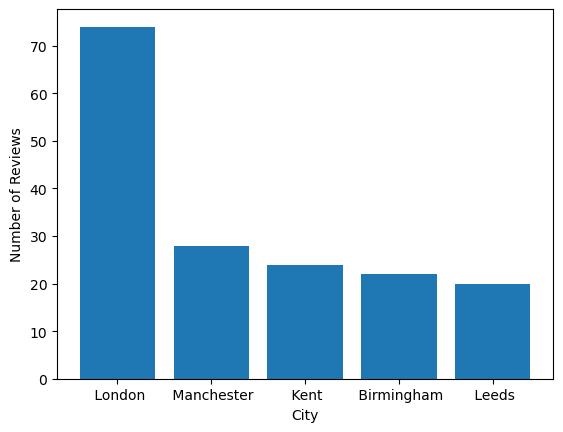

In [15]:
import matplotlib.pyplot as plt
#create a new df that contains all the cities that isnt N\A
filtered_df = df.loc[df['location'] != 'N/A']

# get the top cities by using counter then sorting the values and finally get only the first 5
top_cities = filtered_df['location'].value_counts().sort_values(ascending=False).head(5)

# Plot a bar chart of review counts by city
plt.bar(top_cities.index, top_cities)
plt.xlabel('City')
plt.ylabel('Number of Reviews')
# show the plot
plt.show()

London may have more robust infrastructure or support for VR technology, which could make it easier for consumers in these areas to use and review VR headset products

### 3.4.2.Preprocessing and cleaning text data for Sentiment Analysis and Topic Modelling
<p> 
    In order to get accurate results from sentiment analysis and topic modeling, we develop functions that filter and pre-process text by:
    <ul>
        <li> Implementing regular expressions to strip special characters and punctuation marks. </li>
        <li> Implementin NLTK for to remove stop words and perform tokenization and lemmatization on the remaining words.</li>
        <li> Concatenating the filtered and pre-processed words to create a cleaned filtered version of the text.</li>           
    </ul>
<p>
    Lemmatization is the process of reducing a word to its base form. It  produce more accurate and meaningful forms of words than stemming. Hence, lemmatization is often preferred over stemming for tasks that require a high degree of accuracy or interpretability, which is needed in sentiment analysis and topic modeling.
</p>

In [16]:
### https://stackoverflow.com/questions/18429143/strip-punctuation-with-regex-python ###

# function that removes special characters, punctuations, extra whitespace from text
def strip_special_characters(text):    
    # compile a regular expression pattern that matches one or more spaces
    pattern = re.compile('\s+')
    
    # removes any special characters and punctuations from text
    clean_text = re.sub(r'[^\w\s]',' ',text)
    
    # renoves any underscore from the text
    clean_text = re.sub(r'_',' ',clean_text)
    
    #removes exccess white space from the text
    clean_text = pattern.sub(' ', clean_text)
    
    #returns the text clean from special characters, punctuations, underscore and exccess white space
    return clean_text

# lowercase text
def get_lowercase(text):
    return [word.lower() for word in text]

# tokenize the reviews text 

### lab 5 ### 
### https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ ###

def strip_stop_words(text):
    try:
        stop_words = set(stopwords.words('english'))
        cleaned = [word for word in text if word not in stop_words]
        return cleaned
    except:
        # return empty list
        return []
# Lemmatization is generally more accurate than stemming
# If the context in which the words are used is important, lemmatization may be a better choice
# preserve the original meaning of the words and improve the accuracy of the analysis


### https://www.geeksforgeeks.org/python-lemmatization-with-nltk/ ###


### if not all(isinstance(x, str) ###


def lemmatize_words(text):        
    try:
        lemmatizer = WordNetLemmatizer()
        cleaned = [lemmatizer.lemmatize(word) for word in text]
        return cleaned
    except:
        # return empty list
        return []
    
def concatenate_words(text):
    # checks if the input is a list or a string
    if isinstance(text, list):
        tokens = []
        for word in text:
            # Convert each word to a string and add it to the list of tokens
            tokens.append(str(word))
        # Concatenate the tokens with a space separator
        return ' '.join(tokens)
    # checks if the input is a string, return it as is
    if isinstance(text, str):       
        return text    

Apply the filtering to the DataFrame reviews column

In [17]:
df['reviews'] = df['reviews'].apply(lambda x: strip_special_characters(x))
df['reviews'] = df['reviews'].apply(word_tokenize)
df['reviews'] = df['reviews'].apply(get_lowercase)
df['reviews'] = df['reviews'].apply(strip_stop_words)
df['reviews'] = df['reviews'].apply(lemmatize_words)
df['reviews'] = df['reviews'].apply(concatenate_words)
df

title  \
0             Fast and Accurate Shopping   
1                      Mr Donatas Barkus   
2                          Great product   
3                   Present for daughter   
4                           Meta Quest 2   
...                                  ...   
1305  Fun device, Abut not for everyone!   
1306                    Great family fun   
1307             Not bad, not bad at all   
1308                            Worth it   
1309                       Great feature   

                                                                                                                                                                                                                                                    reviews  \
0                                                                                                                                                                                                        pleased stock accuracy help employee fast shopping   
1                                                                                                                                                                                                                                    good staff family like   
2                                                                                                                                                                                                                                son enjoying must item age   
3                                                                                                                                                                                      bought christmas present daughter happy delivery ewas delivered care   
4                                                                                                                                                                                           excellent value money happy customer would definitely recommend   
...                                                                                                                                                                                                                                                     ...   
1305                                                                                                great fun son instantly gave daughter motion sickness say blurb affected two u quite badly son love though long plenty space move around told brilliant   
1306  8 year old autistic son love play occulus give sensory input give piece he playing lol occulus also great family adventure fun game virtual reality car racing shooting target many great brain training competitive game good choice family fun time   
1307                                                                                                           bought bought rift turn last patch stopped use usb c adaptor buy quest 2 disappointed good non pc vr kit however oculus software bit rubbish   
1308                                                                                waiting get xbox series x taken long decided try world vr without pc great gaming half us escape room downside streaming drop often ab export video via facebook useful   
1309                                                                                                                                                                                                                        nice game play happy thank argo   

                 location   timestamp  
0                  Ankara  2022-12-22  
1                  London  2022-12-21  
2               Droitwich  2022-12-21  
3                 Prescot  2022-12-14  
4                Teesside  2022-12-13  
...                   ...         ...  
1305          West Sussex  2021-09-22  
1306            Liverpool  2021-09-22  
1307           Manchester  2021-09-21  
1308           Chelmsford  2021-09-21  
1309 

### 4.Sentiment Analysis
Sentiment analysis is the process of using computational methods to identify and classify opinions expressed in a text, with the aim of determining the writer's attitude towards a particular topic, product, or other subject. This process involves identifying and interpreting the emotions, opinions, or evaluations expressed in the text, and categorizing them as positive, negative, or neutral. [wikipedia] </br>
Heres the following steps on how I calculated the sentiments of each review using Vader from NLTK and calculating the composite score:
<ol>
  <li>The <code>classify_sentiment</code> function takes a list of tokens as input and concatenates them into a single string using the <code>concatenate_words</code> function.</li>
  <li>If the input is not a string, the function returns a dictionary with default values for the sentiment and the percentages of positive, negative, and neutral sentiments.</li>
  <li>The function then instantiates a <code>SentimentIntensityAnalyzer</code> object from the <code>nltk.sentiment.vader</code> library and uses it to calculate the sentiment scores for the input string.</li>
  <li>The <code>calculate_sentiment_percent</code> function is called to calculate the percentages of positive, negative, and neutral sentiments using the sentiment scores.</li>
  <li>If the compound score (a composite score that takes into account the positive, negative, and neutral scores) is greater than or equal to 0.05, the function returns a dictionary with the sentiment label "positive" and the calculated percentages.</li>
  <li>If the compound score is less than or equal to -0.05, the function returns a dictionary with the sentiment label "negative" and the calculated percentages.</li>
  <li>If the compound score is between -0.05 and 0.05 (inclusive), the function returns a dictionary with the sentiment label "neutral" and the calculated percentages.</li>
  <li>If any errors occur during the execution of the function, a dictionary with default values for the sentiment and the percentages is returned.</li>
</ol>

In [18]:
### "Python Natural Language Processing" by Jacob Perkins (Chapter 3, "Sentiment Analysis") ###
# using sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def calculate_sentiment_percent(sentiment):
    # validates if the the dictionary has the correct keys pos, neg and neu   
    keys = {'pos', 'neg', 'neu'}
    if not keys.issubset(sentiment.keys()):
        raise ValueError('must have the following three keys: "pos", "neg", "neu"')
        
    # Calculate the percentage of positive, negative, and neutral sentiments
    total = sum(sentiment.values())
    pos_percent = sentiment['pos'] / total * 100
    neg_percent = sentiment['neg'] / total * 100
    neu_percent = sentiment['neu'] / total * 100
    
    # returns the percentage of positive, negative, and neutral sentiments
    return pos_percent, neg_percent, neu_percent

def classify_sentiment(tokens):
    text = concatenate_words(tokens)
    # validates if the the input is a string
    if not isinstance(text, str):
        return {'sentiment': 'N\A', 'pos_percent': 0, 'neg_percent': 0, 'neu_percent': 0}

    try:
        sid = SentimentIntensityAnalyzer()
        sentiment = sid.polarity_scores(text)

        pos_percent, neg_percent, neu_percent = calculate_sentiment_percent(sentiment)

        if sentiment['compound'] >= 0.05:
            return {'sentiment': 'positive', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
        elif sentiment['compound'] <= -0.05:
            return {'sentiment': 'negative', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
        else:
            return {'sentiment': 'neutral', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
    except:
        return {'sentiment': 'N\A', 'pos_percent': 0, 'neg_percent': 0, 'neu_percent': 0}

In [19]:
pd.set_option('display.max_rows', 1000)

df['sentiment'] = df.apply(lambda row: classify_sentiment(row['reviews'])['sentiment'], axis=1)

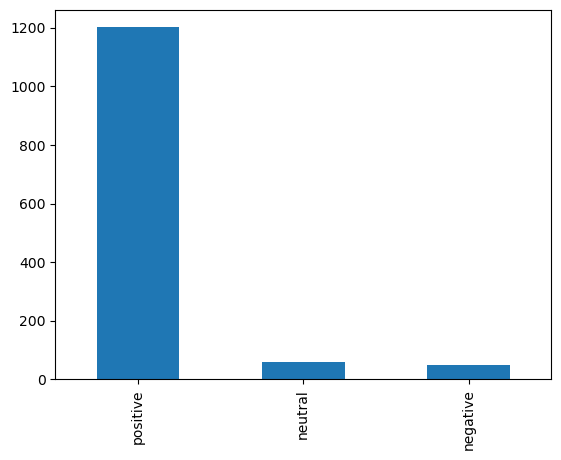

In [20]:
import matplotlib.pyplot as plt
#Assume df is your Pandas DataFrame and 'column' is the column you want to plot
counts = df['sentiment'].value_counts().sort_values(ascending=False)

# Plot the counts as a bar plot
counts.plot(kind='bar')

# Show the plot
plt.show()

## 5.Topic Modelling using BERTopic
<p>
BERTopic is a topic modeling technique that leverages embedding models and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. BERTopic supports guided, (semi-) supervised, hierarchical, and dynamic topic modeling [10].
</p>

In [21]:
#!pip install bertopic
from bertopic import BERTopic

docs = df.reviews
topic_model = BERTopic(nr_topics="auto")
topics, probs = topic_model.fit_transform(docs)


In [22]:
topic_model.get_topic_info()

Topic  Count                            Name
0      -1    198    -1_great_game_bought_amazing
1       0    355     0_son_love_bought_christmas
2       1    339        1_vr_headset_oculus_game
3       2    141         2_game_easy_love_bought
4       3     85        3_ago_month_bought_happy
5       4     82  4_product_happy_excellent_item
6       5     25    5_family_fun_great_brilliant
7       6     24     6_argo_service_always_happy
8       7     18         7_battery_life_use_long
9       8     17           8_world_fun_much_like
10      9     13         9_kit_piece_bit_amazing
11     10     13     10_beat_saber_exercise_week

In [23]:
df["topic"] = topics

In [27]:
# shows the representative docs
topic_model.representative_docs_[7]

['best thing bought fantastic family spent hour since got wish longer battery life need changing much addicted',
 'battery last long ok remote started going one way 2 week also need space play game overall great product',
 'bought partner love would recommend product side battery last two hour']

In [28]:
# breakdown sentiment by topic
topic_sentiment = {}
for topic, df_ in df.groupby("topic"):
    topic_sentiment[topic] = df_["sentiment"].value_counts() / len(df_) * 100
pd.DataFrame(topic_sentiment)

-1          0          1          2          3      4      5   \
negative   3.535354   2.816901   4.424779   4.255319   8.235294    NaN    NaN   
neutral    6.565657   9.014085   2.359882   0.709220   4.705882    NaN    NaN   
positive  89.898990  88.169014  93.215339  95.035461  87.058824  100.0  100.0   

                 6          7          8      9          10  
negative   4.166667   5.555556   5.882353    NaN        NaN  
neutral         NaN  11.111111        NaN    NaN   7.692308  
positive  95.833333  83.333333  94.117647  100.0  92.307692

In [ ]:
# print(topic_sentiment)

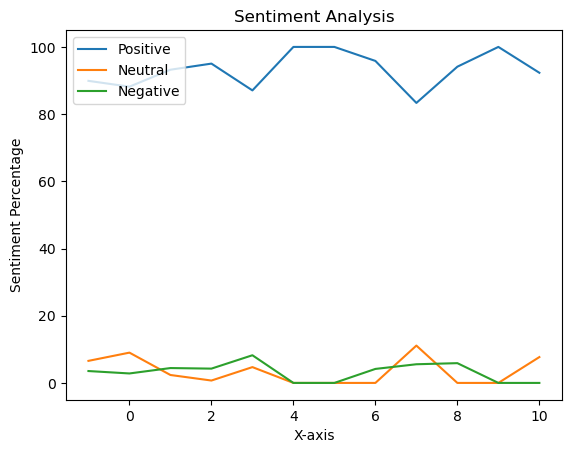

In [29]:
import matplotlib.pyplot as plt

# get the values from the topic_sentiment dict and store them in separate lists
x_values = list(topic_sentiment.keys())
positive_values = []
neutral_values = []
negative_values = []

for key, value in topic_sentiment.items():
    if 'positive' in value:
        positive_values.append(value['positive'])
    else:
        positive_values.append(0)
    if 'neutral' in value:
        neutral_values.append(value['neutral'])
    else:
        neutral_values.append(0)
    if 'negative' in value:
        negative_values.append(value['negative'])
    else:
        negative_values.append(0)

# Create the line chart
plt.plot(x_values, positive_values, label='Positive')
plt.plot(x_values, neutral_values, label='Neutral')
plt.plot(x_values, negative_values, label='Negative')

# Add a title and axis labels
plt.title('Sentiment Analysis')
plt.xlabel('X-axis')
plt.ylabel('Sentiment Percentage')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [ ]:
df[(df.topic == 5)]

In [ ]:
# ! pip install keybert

In [30]:
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(df[df.topic == 5]["reviews"].to_list())# keyphrase_ngram_range=(1))

In [35]:
from collections import Counter

def get_sorted_topic_keywords(topic_num):    
    kw_model = KeyBERT()
    keywords = kw_model.extract_keywords(df[df.topic == topic_num]["reviews"].to_list())# keyphrase_ngram_range=(1))
    
    # sorted_keywords is a list of tuples where.
    # each tuple consists of a keyword and its frequency.
    # The list is sorted in descending order of frequency by applying the sorted function.
    # display only the 10 first.
    sorted_keywords = sorted(Counter([xx[0] for x in keywords for xx in x]).items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_keywords

sorted_keywords_by_topic = {}

for topic_num in range(11):
    sorted_keywords = get_sorted_topic_keywords(topic_num)
    sorted_keywords_by_topic[topic_num] = sorted_keywords

print(sorted_keywords_by_topic)
# sorted_keywords_for_topic_5 = sorted_keywords_by_topic[5]
# sorted_keywords_for_topic_5

{0: [('bought', 151), ('son', 131), ('love', 109), ('christmas', 86), ('birthday', 57), ('present', 42), ('fun', 41), ('family', 38), ('daughter', 33), ('grandson', 33)], 1: [('vr', 184), ('headset', 115), ('oculus', 98), ('quest', 52), ('pc', 41), ('bought', 38), ('experience', 33), ('game', 32), ('gaming', 28), ('virtual', 22)], 2: [('game', 62), ('bought', 47), ('christmas', 25), ('set', 18), ('gaming', 16), ('play', 14), ('purchase', 14), ('birthday', 13), ('son', 13), ('free', 12)], 3: [('bought', 58), ('month', 31), ('ago', 29), ('happy', 19), ('week', 14), ('fun', 8), ('use', 8), ('brought', 8), ('worth', 7), ('game', 7)], 4: [('product', 30), ('happy', 29), ('great', 13), ('excellent', 12), ('purchase', 9), ('good', 9), ('fun', 9), ('item', 9), ('recommend', 8), ('pleased', 7)], 5: [('family', 22), ('fun', 16), ('great', 8), ('brilliant', 4), ('hour', 3), ('excellent', 3), ('amazing', 3), ('lot', 3), ('good', 2), ('time', 2)], 6: [('argo', 22), ('bought', 7), ('service', 6), ('

In [36]:
concatenate_words(df[df.topic == 7]["reviews"].to_list())

'apprehensive buying thought might something use couple time put never use wrong use every day completely different way play game socialise careful though found certain game experience give motion sickness eye strain prolonged use also battery life terrible charging lot let thing put though really amazing bit kit brilliant system bug still expected battery life bout 2hours advanced gaming purchase elite head strap additional battery pack really made white though due sweat turning greyish brown haha side u battery u dnt pc steam downside short battery life approx 1 5 hour might positive stop playing eleven table tennis day bought month two ago non stop thing thats negative battery life battery last long ok remote started going one way 2 week also need space play game overall great product battery life bit rubbish amazing product great item battery life seem la long maybe faulty battery got vr boyfriend christmas present absolutely love lightweight portable wireless great battery life gr

4


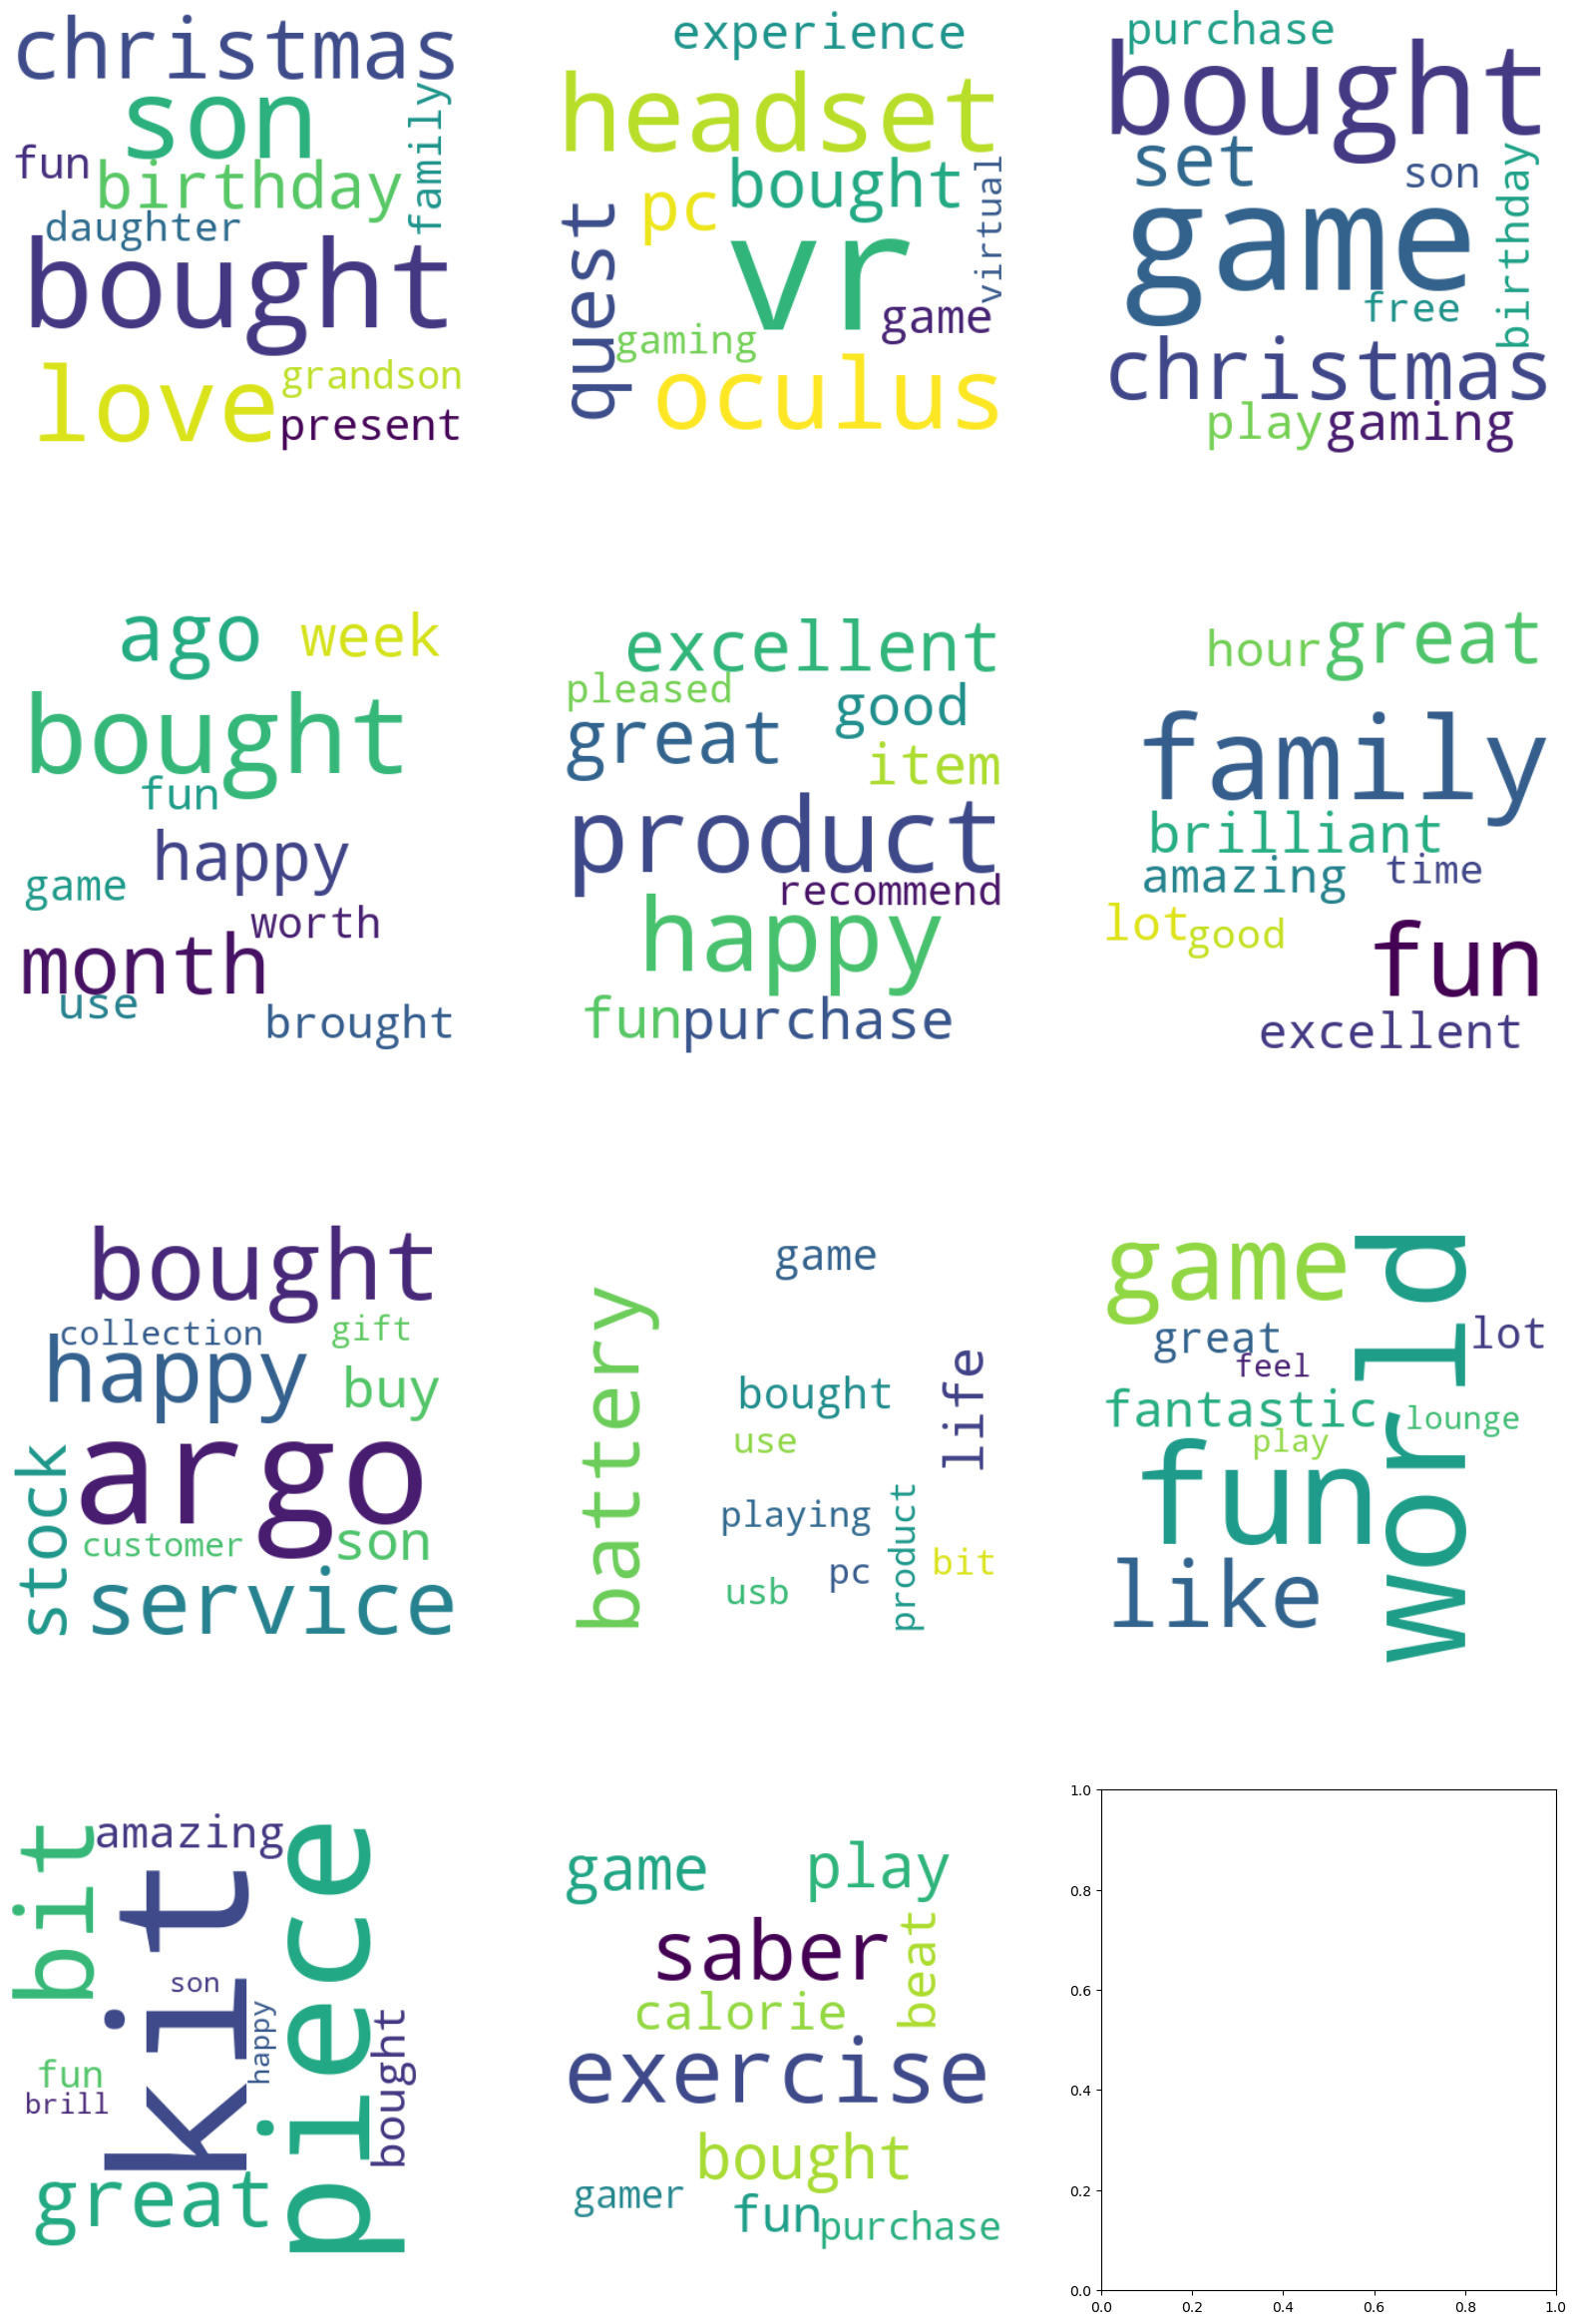

In [51]:
from wordcloud import WordCloud
def generate_word_cloud(sorted_keywords):
    # Create a dictionary from the sorted_keywords list
    keyword_frequencies = dict(sorted_keywords)

    # Create the word cloud
    wordcloud = WordCloud(width=400, height=400, 
                          background_color='white', 
                          min_font_size=10).generate_from_frequencies(keyword_frequencies)
    return wordcloud

# Set the number of columns and rows for the subplots
ncols = 3
nrows = 4 #len(so4 rted_keywords_by_topic) // 2
print(nrows)

# Create a figure with subplots
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))

# Flatten the subplots array
axs = axs.flatten()

# Initialize a counter variable
i = 0

# Loop through the dictionary
for key, sorted_keywords in sorted_keywords_by_topic.items():
    # Generate the word cloud
    wordcloud = generate_word_cloud(sorted_keywords)
    # Display the word cloud in the subplot
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    # Increment the counter variable
    i += 1

# Show the figure
plt.show()

We can see some interesting insight from the last two wordclouds

### 5.3.Keywords Frequency
Understanding Customer Opinions and Preferences through NLP: A Case Study of Meta Quest 2 VR.
we can see from this wordcloud that theres a frequent use of words
of son and grandson which suggests relationship, birthday," "present," and "xmas" suggests that the text may be related to celebrations or gift-giving.


In [ ]:
generate_word_cloud(sorted_keywords_by_topic[6])

In [52]:
def get_keywords_frequencies(sorted_keywords):
    # gets the first element of each tuple. (frequency)
    keywords = [keyword for keyword, frequency in sorted_keywords]
    
    # gets the the second element of each tuple. (keyword)
    frequencies = [frequency for keyword, frequency in sorted_keywords]
    return keywords, frequencies

keywords, frequencies = get_keywords_frequencies(sorted_keywords)
def generate_barh(keywords, frequencies, ax=None, topic_num=None):
    # checks if the keywords and frequencies have the same length
    if len(keywords) != len(frequencies):
        return 'keywords and frequencies are not the same len'

    # Create a new figure and axis object if no ax object is provided
    if ax is None:
        fig, ax = plt.subplots()

    # Create the bar chart using the ax object
    ax.barh(keywords, frequencies, color='#228b22')

    # Set the tick labels for the y-axis
    ax.set_yticks(keywords, fontsize = 12)
    ax.set_yticklabels(keywords, fontsize = 12)

    # Add labels and the title
    ax.set_ylabel('Keywords', fontsize=14)
    ax.set_xlabel('Frequency', fontsize=14)
    
    # checks if topic_num is provided, if yes, prints the topic num in the title, else not
    if topic_num is not None:
        ax.set_title(f'Keyword Frequencies for Topic #{topic_num}', fontsize=14)
    else:
        ax.set_title('Keyword Frequencies', fontsize=14)

keywords, frequencies = get_keywords_frequencies(get_sorted_topic_keywords(7))
# generate_barh(keywords, frequencies)

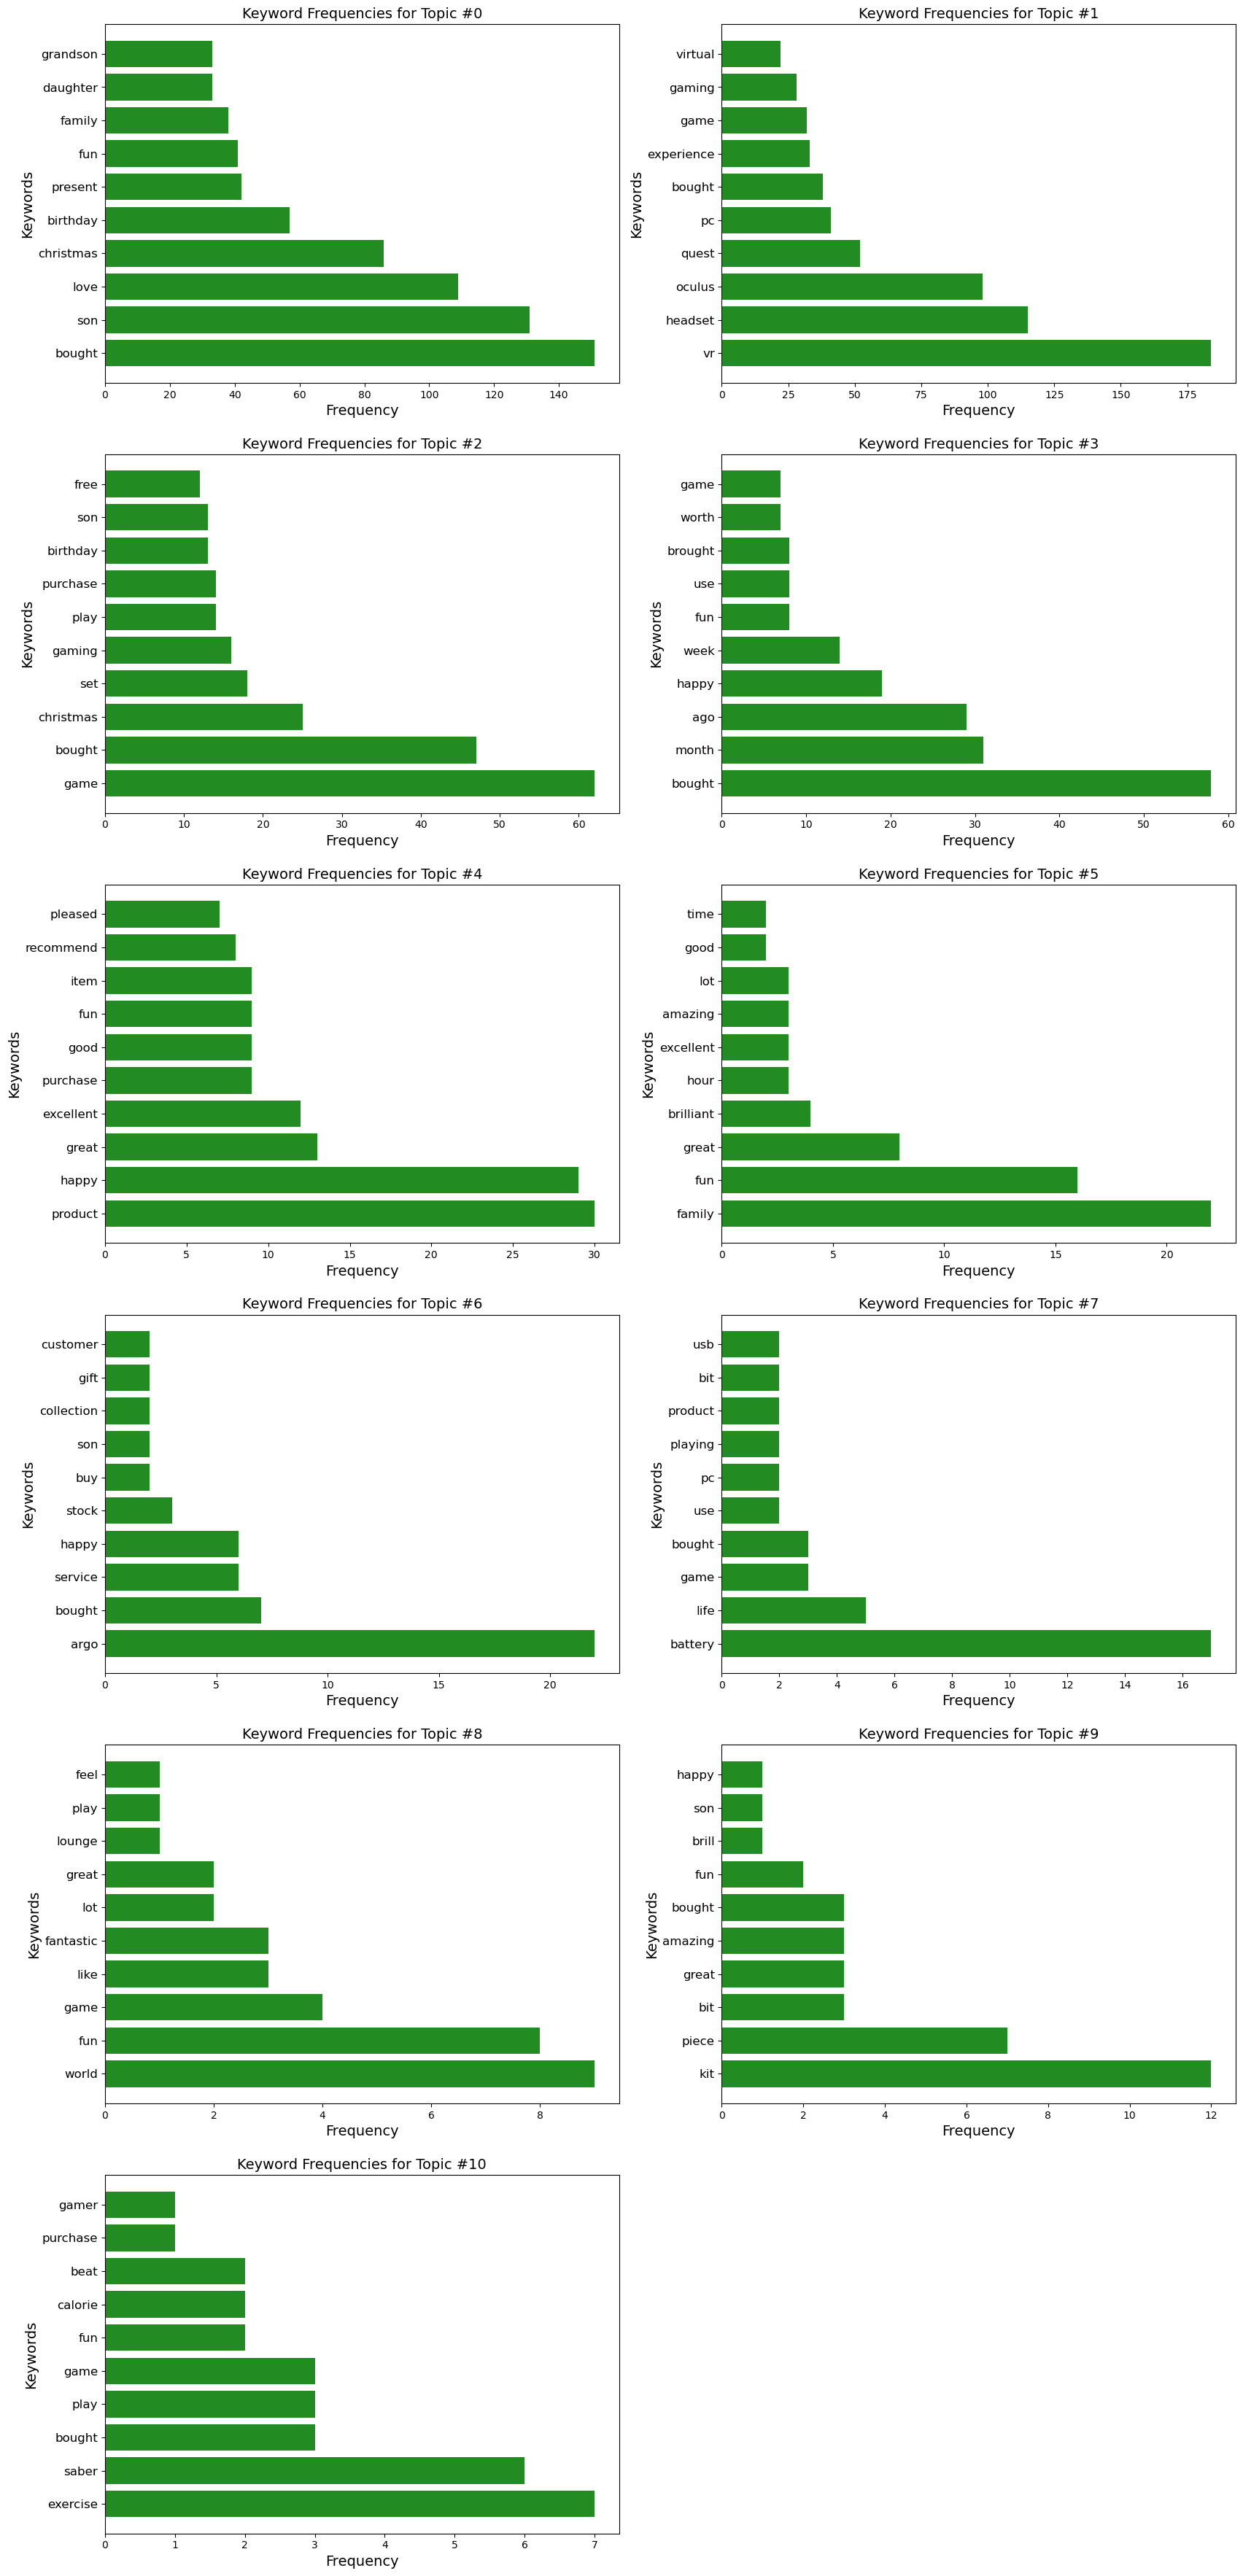

In [54]:
# Set the figure size
plt.figure(figsize=(20, 60))

# Loop over the range 0 to the length of the sorted_keywords_by_topic 
for topic in range(len(sorted_keywords_by_topic)):
    # Get the sorted topic keywords and frequencies
    keywords, frequencies = get_keywords_frequencies(get_sorted_topic_keywords(topic))

    # Create a subplot
    ax = plt.subplot(8, 2, topic + 1)
  
    # Call the generate_barh function and pass the ax object
    generate_barh(keywords, frequencies, ax, topic)

# Show the plot
plt.show()

### Interactive visualization of topics by Intertopic Distance map

In [55]:
topic_model.visualize_topics()

The slider allows the user to select a specific topic, which is highlighted in red. When hovering over a topic, general information about the topic, including its size and corresponding words, is displayed. [10]

### Hierarchical Clustering 
Hierarchical clustering can be used to group together words that frequently appear in the same documents. This can help to identify the main themes or topics present in a dataset of text documents.

In [57]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 253.22it/s]


In [58]:
topic_model.visualize_heatmap()

## 6.Conclusion
<p> Our analysis of customer reviews of the Meta Quest 2 VR headset revealed that battery life was a common concern among users. Upon conducting sentiment analysis on this topic, we observed a decline in positive sentiments and an increase in neutral and negative sentiments in the topic about battery. This trend suggests that the battery lifespan of the Meta Quest 2 VR headset may be perceived as short by users. To further confirm our findings, we consulted multiple well-respected tech industry sources, including PCMag [20], CNET [21], Techspot [22], and Mashable [23], which all identified battery life as a common drawback of the Meta Quest 2 VR headset.  </p>


<p> In summary, our study suggests that the battery lifespan of the Meta Quest 2 VR headset is a potential area for improvement. as supported by both our analysis on the customer reviews and independent sources </p>

## 7.Future Work
<ul>
    <li> Explore other neural models for keyword extraction and compare their performance to the KeyBERT model </li>
    <li> Investigate the effectiveness of the extracted keywords for applications such as text summarization </li>
    <li> Apply Time-series Analysis to see the relationship between sentiment over time </li>
</ul> 


# References and Resources
#### Report
[1] Sentiment analysis: Why it's necessary and how it improves CX from https://www.techtarget.com/searchcustomerexperience/tip/Sentiment-analysis-Why-its-necessary-and-how-it-improves-CX </br>
[2] Topic modelling from https://en.wikipedia.org/wiki/Topic_model </br>

[20] PCMag Oculus Quest 2 review from https://www.pcmag.com/reviews/oculus-quest-2 </br>
[21] CNET Oculus Quest 2 review from https://www.cnet.com/tech/gaming/facebook-oculus-quest-2-vr-review-one-of-my-favorite-game-consoles/ </br>
[22] Techspot Oculus Quest 2 review from https://www.techspot.com/products/audio-video/oculus-quest-2.224801/ </br>
[23] Mashable Oculus Quest 2 review from https://mashable.com/review/oculus-quest-2-review </br>

#### General
[3] Lambda function with pandas DataFrame from : www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

#### Web Scraping 
[11] Selenium waits from https://selenium-python.readthedocs.io/waits.html </br>
[12] Using lambda function with Pandas DataFrames from https://pandas.pydata.org/pandas-docs/stable/user_guide/apply.html </br>
[13] Worked examples of lambda function from https://sparkbyexamples.com/pandas/pandas-apply-with-lambda-examples/ </br>
#### Sentiment Analysis
[14] Sentiment Analysis using Vader from https://www.nltk.org/api/nltk.sentiment.vader.html </br>
[14] Sentiment Analysis calculatuing compound score from https://github.com/cjhutto/vaderSentiment#about-the-scoring

#### Topic Modelling
[10] BERTopic from https://spacy.io/universe/project/bertopic </br>